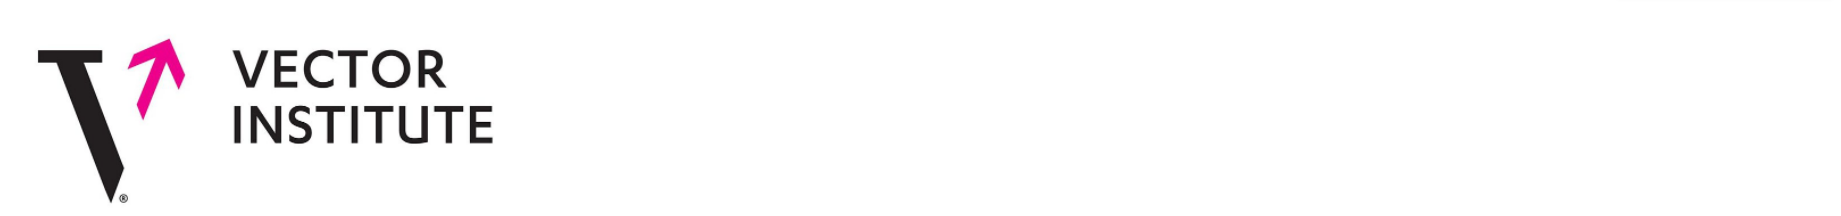

### **Welcome to the Machine Learning Course for Black and Indigenous Students!**
This program is offered by Vector Institute in its drive to build research and expand career pathways in the field of AI for under-represented populations.

Instructor: Bonaventure Molokwu | Assignment Developer: Manmeet Kaur Baxi | Course Tutors: Yinka Oladimeji and Manmeet Kaur Baxi | Course Director: Shingai Manjengwa (@Tjido) 

### ***Never stop learning!***

### Assignment - IV, SVM & Neural Networks

**Dataset** https://www.kaggle.com/ombais/mnist-fashion-data-classification 
The dataset contains a database of handwritten digits. It is made up a training set of 60,000 examples, and a test set of 10,000 examples. The digits have been size-normalized and centered in a fixed-size image. The goal of the assignment is to train models with SVM and Neural Network to understand the patterns in the pixels of each digit in the dataset.


### Import Libraries

In [ ]:

# Required Libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn import svm
from sklearn.utils import shuffle
from sklearn.decomposition import PCA
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import cross_val_score, GridSearchCV
from sklearn import metrics
STATE = 101

### Load Data

In [ ]:
# read the dataset

train = pd.read_csv('https://www.dropbox.com/s/asvw84qy2xbualr/mnist_train.csv?dl=1')
test = pd.read_csv('https://www.dropbox.com/s/wqkrfyiqbexx8im/mnist_test.csv?dl=1')

train.head()

,label,1x1,1x2,1x3,1x4,1x5,1x6,1x7,1x8,1x9,...,28x19,28x20,28x21,28x22,28x23,28x24,28x25,28x26,28x27,28x28
0,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


###Shuffle Dataset to ensure random patterns

In [ ]:
# Shuffling training data
train_shuffled = shuffle(train.values, random_state=STATE)

# Extracting features as X and labels as y
X_train = train.drop(labels = ["label"],axis = 1) 
y_train = train["label"]

# Loading test data (no labels are provieded)
X_test = test.drop(labels = ["label"],axis = 1) 
y_test = test["label"]

print(f'X_train = {X_train.shape}, y = {y_train.shape}, X_test = {X_test.shape}')

X_train = (60000, 784), y = (60000,), X_test = (10000, 784)


###Data Visualization

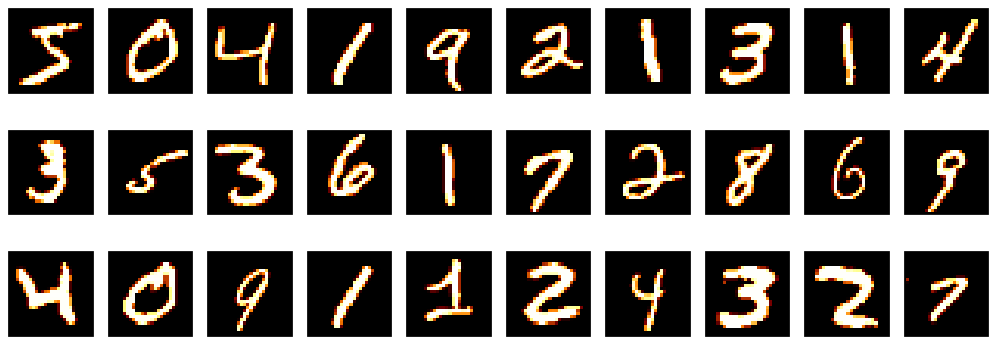

In [ ]:
# Plotting some digits
plt.figure(figsize=(14,12))
for digit_num in range(0,30):
    plt.subplot(7,10,digit_num+1)
    grid_data = X_train.iloc[digit_num].values.reshape(28,28)  # reshape from 1d to 2d pixel array
    plt.imshow(grid_data, interpolation = "none", cmap = "afmhot")
    plt.xticks([])
    plt.yticks([])
plt.tight_layout()

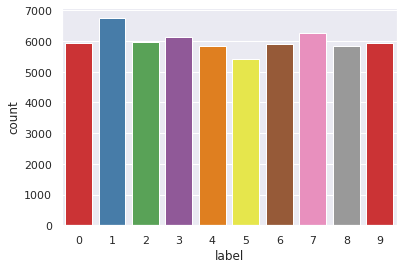

In [ ]:
# Exploring the class distribution (almost equally distributed)
sns.set(style="darkgrid")
counts = sns.countplot(x="label", data=train, palette="Set1")

## Model Building
Let's now build the model and tune the hyperparameters. Let's start with a **linear model** first.

### Linear SVM
### Q1. Use different scaling techniques to create a Linear SVM. Compare the overall accuracies on the test set and give reasons which scaling method performs better and why. (4 marks)
Hint: Use *Standard Scaler* and *MinMaxScaler* in the ranges *(0,1)* or *(-1,1)*

In [ ]:
###########  MIN MAX SCALER
from sklearn.preprocessing import MinMaxScaler
# Handling the missing values """
from sklearn import preprocessing
min_max_scaler = preprocessing.MinMaxScaler(feature_range =(0, 1))
# Scaled feature
X_after_min_max_scaler = min_max_scaler.fit_transform(X_train)
print ("\nAfter min max Scaling : \n", X_after_min_max_scaler)


After min max Scaling : 
 [[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


In [ ]:
X_testafter_min_max_scaler = min_max_scaler.fit_transform(X_test)
print ("\nAfter min max Scaling : \n", X_testafter_min_max_scaler)


After min max Scaling : 
 [[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


In [ ]:
####  Standardisation """
  
Standardisation = preprocessing.StandardScaler()
# Scaled feature
X_after_Standardisation = Standardisation.fit_transform(X_train)
  
print ("\nAfter Standardisation : \n", X_after_Standardisation)


After Standardisation : 
 [[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


In [ ]:
X_testafter_Standardisation = Standardisation.fit_transform(X_test)
  
print ("\nAfter Standardisation : \n", X_testafter_Standardisation)


After Standardisation : 
 [[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


In [ ]:

from sklearn.svm import LinearSVC
model = LinearSVC(loss='hinge', dual=True)
model.fit(X_after_min_max_scaler, y_train)
print(model, X_after_min_max_scaler, y_train, X_testafter_min_max_scaler, y_test)

LinearSVC(loss='hinge') [[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]] 0        5
1        0
2        4
3        1
4        9
        ..
59995    8
59996    3
59997    5
59998    6
59999    8
Name: label, Length: 60000, dtype: int64 [[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]] 0       7
1       2
2       1
3       0
4       4
       ..
9995    2
9996    3
9997    4
9998    5
9999    6
Name: label, Length: 10000, dtype: int64


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


In [ ]:
# an initial SVM model with linear kernel   
svm_linear = svm.SVC(kernel='linear')

# fit
svm_linear.fit(X_after_min_max_scaler, y_train)
y_pred = svm_linear.predict(X_testafter_min_max_scaler)

# measure accuracy
acc=metrics.accuracy_score(y_test,y_pred)

# View the class-wise accuracy of the scaling technique which performs better of the two
class_wise = metrics.classification_report(y_true=y_test, y_pred=y_pred)
print(class_wise)


              precision    recall  f1-score   support

           0       0.95      0.98      0.96       980
           1       0.97      0.99      0.98      1135
           2       0.93      0.94      0.93      1032
           3       0.91      0.94      0.92      1010
           4       0.94      0.96      0.95       982
           5       0.91      0.90      0.91       892
           6       0.96      0.95      0.95       958
           7       0.95      0.93      0.94      1028
           8       0.94      0.90      0.92       974
           9       0.95      0.91      0.93      1009

    accuracy                           0.94     10000
   macro avg       0.94      0.94      0.94     10000
weighted avg       0.94      0.94      0.94     10000



### Q2. Run the SVM algorithm with different types of kernels as discussed in the class (i.e., polynomial, RBF, and Sigmoid). Compare the test accuracies and time taken by each one of them. (5 marks)


In [ ]:

### Polynomial Kernel
from sklearn.svm import SVC
svclassifier = SVC(kernel='poly',degree=2)
svclassifier.fit(X_after_min_max_scaler,y_train)

### SVM rbf kernel
from sklearn.svm import SVC
svclassifier = SVC(kernel='rbf')
svclassifier.fit (X_train, y_train)

### Sigmoid Kernel
from sklearn.svm import SVC
svclassifier = SVC(kernel='sigmoid')
svclassifier.fit(X_train, y_train)



SVC(kernel='sigmoid')

### Q3. Reduce the dimensionality of the dataset using PCA, plot the PCA output, train the linear SVM and report it's testing accuracy. (2 + 1 + 2 = 5 marks)
*Constraint: PCA should have the 'n_components'=0.90, SVM should have 'C': 2.82842712475, 'gamma': 0.00728932024638*


In [ ]:
# Applying PCA function on training
# and testing set of X component
from sklearn.decomposition import PCA
 
pca = PCA(n_components = 0.9)
 
X_train = pca.fit_transform(X_after_min_max_scaler)
X_test = pca.transform(X_testafter_min_max_scaler)
 
explained_variance = pca.explained_variance_ratio_

### Q4. Create a simple Convolutional Neural Network (CNN) after reshaping the normalized input features to a size of (28, 28, 1), initial filter size as 32, max-pooling size of 2,dropout of 0.2, and a dense layer of 30 before the final output layer. Train the model for 100 epochs and report the plots of training accuracy and loss alongwith the overall loss and accuracy on the testing set. (5 marks)

In [ ]:
import numpy as np
import keras
from keras.datasets import mnist
from keras.models import Model
from keras.layers import Dense, Input
from keras.layers import Conv2D, MaxPooling2D, Dropout, Flatten
from keras import backend as k


img_rows, img_cols=28, 28
 
if k.image_data_format() == 'channels_first':
   X_train = X_train.reshape(X_train.shape[0], 1, img_rows, img_cols)
   X_test = X_test.reshape(X_test.shape[0], 1, img_rows, img_cols)
   inpx = (1, img_rows, img_cols)
 
else:
   X_train = X_train.reshape(X_train.shape[0], img_rows, img_cols, 1)
   X_test = X_test.reshape(X_test.shape[0], img_rows, img_cols, 1)
   inpx = (img_rows, img_cols, 1)
 
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255



inpx = Input(shape=inpx)
layer1 = Conv2D(32, kernel_size=(3, 3), activation='relu')(inpx)
layer2 = Conv2D(64, (3, 3), activation='relu')(layer1)
layer3 = MaxPooling2D(pool_size=(3, 3))(layer2)
layer4 = Dropout(0.5)(layer3)
layer5 = Flatten()(layer4)
layer6 = Dense(250, activation='sigmoid')(layer5)
layer7 = Dense(10, activation='softmax')(layer6)


model = Model([inpx], layer7)
model.compile(optimizer=keras.optimizers.Adadelta(),
              loss=keras.losses.categorical_crossentropy,
              metrics=['accuracy'])
 
model.fit(x_train, y_train, epochs=12, batch_size=500)

ValueError: ignored

### Q5. What can be the possible reasons for: (1 marks)
1. SVM performs slightly better than the CNN after dimension reduction ? 
2. The test accuracy when using the Sigmoid kernel drops significantly ?

1. The CNN required to use PCA to reduce the dimensions of the data that is reducing noisy bands. However, the approach required augmentation to increase the dataset training samples. Though the CNN accuracy  visual interpretation contradict such accuracy, where SVM classifiers have shown better accuracy performance.

2. The sigmoid kernel function produced the best results for permeability prediction.